# Machine Learning Engineer Nanodegree

# Projeto Final
Vinicius Vieira
16/03/2018

## I. Definição
### Visão geral
Este projeto tem por objetivo ser meu trabalho final do curso Nano Degree de Engenheiro de machine learning e também servir como primeira experiência na aplicação das técnicas aprendidas nesse curso, tem como objetivo também entregar um modelo de dados de valor significativo para a empresa em que trabalho dando assim uma motivação maior para a realização do trabalho.

A empresa em que trabalho se concentra na maior parte do tempo com controle e auditorias de processos mais especificamente na parte de habilitação para condução de veículos automotores, sendo assim, nós efetuamos monitoramento nas etapas envolvidas em um processo através de câmeras, sensores e biometria, também avaliamos as informações recebidas a fim de perceber e 
evitar eventuais fraudes sempre através da relatatórios ou ainda por avaliação humana. O conjunto de sistemas envolvidos também implementam suas próprias regras afim de promover um fluxo de trabalho organizado e que cumpra a legislação vigente.

Dentro desse cenário é de se imaginar que conforme o número processos monitorados e auditados a quantidade de dados a serem analisados crescem com muita agilidade e existe um sub conjunto desse universo de dados especialmente preocupante dentro de nossa realidade que são as aulas em auditoria, essas aulas são produto do monitoramento das aulas veiculares práticas obrigatórias que por algum motivo técnico foram executadas com alguma anormalidade e chegam aos servidores da empresa com uma marcação que devem ser especialmente analisadas.

Uma equipe é responsável por listar todas essas aulas e passar por cada uma conferindo todo o tipo de dados, para garantir que realmente essa aula é válida, ou seja se ela foi efetuada de fato e pelas pessoas corretas. Sendo assim os integrantes dessa equipe análisam informações como: A foto tirada no momento do inicio e do final da aula conferem com as fotos do aluno e do instrutor tiradas no momento da matrícula e do credenciamento respectivamente, os sensores que monitoram o funcionamento dos componentes do veículos correspondem ao que é observado em uma aula normal, o tempo dessa aula respeita os limites impostos pela legislação, as informações sobre o rendimento do aluno foram preenchidas corretamente, as posicções gps indicam um percurso compatível com o de uma aula. Caso essas informações forem conferidas com sucesso a aula é validada e passa a ser computada para a carga horária obrigatória do aluno, caso contrário ela é bloqueada e a aula deverá ser realizada novamente em outra ocasião.

É justamente nessa hora da avaliação manual das aulas que acontecem os maiores atrasos que podem prejudicar um aluno ou uma escola e até fazer com que o processo do aluno seja perdido se o tempo for muito grande, além do que a equipe tem que constantemente estar em crescimento e mesmo assim sempre tem milhares de aulas para analisar, além do risco de eventuais enganos. Para tentar tornar esse procesos mais ágil, mais confiável e mais agradável de ser realizado pelas pessoas surgiu um desejo em mim após adquirir o conhecimento em machine learning em tentar utilizar as técnicas desse campo da computação para alcançar esses objetivos.

### Definição do problema
Como foi introduzido na seção anterior um grande número de aulas necessitam ser analisadas manualmente devido a diversos fatores que as tornam um ponto de atenção como falhas técnicas. Para ficar mais claro citarei um exemplo: Existem capturas digitais biométricas do instrutor e do aluno no inicio da aula, caso não seja possível comparar essas digitais com as do cadastro no momento do inicio da aula, devido a falha na internet ou por falha no scanner, essa é uma aula que sera marcada para auditoria.

Na minha opinião com todos os dados disponiveis para análise é possível formular um modelo que automatize o processo de forma satisfatória, classificando se aulas devem ou não serem consideradas válidas. No decorrer desse projeto irei fazer alguns testes com métodos de aprendizagem supervisionada para atingir uma precisão que seja aceitável.

Serão também utilizados métodos de eliminação de outliers, seleção de atributos e normalização de caracteristicas sempre que estes tragam apromoramento aos resultados.

### Métricas
As métricas que utilizarei serão FScore e o Score, sempre avalidas em um conjunto de testes ou seja dados que o modelo não tenha visto no treinamento para garantir que ele seja capaz de generalizar.

# II. Análise

## Exploração dos dados
Para iniciar a exploração dos dados vamos começar entendendo melhor sua origem, as informações foram em sua maioria obtidas de um banco de dados relacional mantido pela empresa que contém todos os detalhes das aulas armazenados de forma normalizada, a princípio o que foi necessário, foi refletir e reunir essas informações realizando funções de agregações para gerar dados quantitativos que podessem ser analisados, além disse acrescentei informações adicionais ao passar as imagens existentes das aulas em um servidor de reconhecimento facial e também em servidor para reconhecimento de pessoas, com o primeiro obtive a resposta de em qual porcentagem das fotos das aulas foi possível conferir a identidade do aluno com sua foto do cadastro,atributo: "perc_sucesso_comp_candidato", e no segundo obtive a informação sobre quantas pessoas foram identificadas dentro da aula e gerei uma estatística de quantos porcento das imagem da aula possuia duas pessoa, conforme deve ser. É importante observar aqui que, uma aula tem em média 12 imagens e aproximadamente metade serão do interior do veículo e metade do exterior não sendo possível distinguir qual é qual, sendo assim uma aula onde instrutor e aluno estão presente em todas as imagens de dentro do carro a porcentagem será de 50%, atributo  "perc_com_2_pessoa".
Não existem valores nulos pois isso foi evitado ao recuperar os dados do banco de dados, a váriavel alvo que gostariamos de prever será a "liberou" e será separada do dataset.
Alguns atribuitos tem números como nome de coluna, cada um desses número é um motivo para aula ter sido enviada a auditoria, a descrição do motivo foi substituida por número pois se tratar de uma informação potencialmente sensível.

Na linha abaixo temos uma pequena pré-visualização dos dados.


In [54]:
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
aulas_data_set=pd.read_csv('data_set.CSV')

aulas_data_set=aulas_data_set.drop(columns=['vinteseis'])
print(aulas_data_set.shape)
aulas_data_set.head()


(1945, 60)


,liberou,distancia_total_km,tempo_total,velocidade_media,perc_mudanca_direcao_direita,perc_mudanca_direcao_esquerda,perc_freio_mao,perc_pedal_freio,perc_ignicao,perc_marcha_re,...,dezenove,vinte,vinteum,vintedois,vintetres,vintequatro,vintecinco,vintesete,vinteoito,vintenove
0,1,16.6279,45.6667,11.7304,0.1081,0.0460,0.0847,0.2484,0.9702,0.0863,...,0,0,0,0,0,0,0,0,0,0
1,1,5.5702,45.7000,18.8245,0.0227,0.0154,0.2524,0.1981,1.0000,0.0276,...,0,0,0,0,0,0,0,0,0,0
2,0,5.5630,49.7000,0.2200,0.0000,0.0007,0.9806,0.0037,0.0940,0.0127,...,0,0,0,0,0,0,0,0,0,0
3,1,22.2233,60.4333,8.1031,0.0146,0.0291,0.6019,0.2913,1.0000,0.0777,...,0,0,0,0,0,0,0,0,0,0
4,0,5.5627,49.9000,5.2646,0.0135,0.0098,0.6409,0.1818,0.4282,0.0068,...,0,0,0,0,0,0,0,0,0,0


Abaixo mais alguma informações sobre os dados:

In [55]:
aulas_auditoria_shape= aulas_data_set.shape

n_aulas_auditoria = aulas_auditoria_shape[0]
n_caracteristiscas = aulas_auditoria_shape[1]-1


n_liberadas = aulas_data_set[aulas_data_set["liberou"]==1].shape[0]

n_n_liberadas = aulas_data_set[aulas_data_set["liberou"]==0].shape[0]

porcentagem_liberacao = (float(n_liberadas)/float(n_aulas_auditoria))*100


print ("Número total de estudantes: {}".format(n_aulas_auditoria))
print ("Número de atributos: {}".format(n_caracteristiscas))
print ("Número de aulas liberadas: {}".format(n_liberadas))
print ("Número de estudantes não liberadas: {}".format(n_n_liberadas))
print ("Taxa de liberacao: {:.2f}%".format(porcentagem_liberacao))

Número total de estudantes: 1945
Número de atributos: 59
Número de aulas liberadas: 800
Número de estudantes não liberadas: 1145
Taxa de liberacao: 41.13%


Avaliando o dataset pode ser que teríamos que efetuar algum tipo de trasformação para eliminação de valores extremos, vejamos o exemplo abaixo da columnavinteum:
No caso esse número, representa o número de vezes que essa auditoria foi anotada pra a aula em particular.

In [56]:
print("Valor mínimo para a coluna vinteum: {}".format(aulas_data_set["vinteum"].min()))
print("Valor máximo para a coluna vinteum: {}".format(aulas_data_set["vinteum"].max()))
print("Média para a coluna vinteum: {}".format(aulas_data_set["vinteum"].mean()))

Valor mínimo para a coluna vinteum: 0
Valor máximo para a coluna vinteum: 1065
Média para a coluna vinteum: 3.6118251928020566


Agora vamos separar as carecterísticas dos alvos:

Agora vamos executar uma técnica de detecção de remoção de pontos extremos, para que os mesmos não causem distorções no padrão dos dados:

In [57]:
import collections

ix_outs= np.empty( shape=(0, 0) )
# For each feature find the data points with extreme high or low values
for feature in aulas_data_set.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(aulas_data_set[feature],q=25)
    #print(np.max(log_data[feature]))
   # print(aulas_data_set[feature])
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(aulas_data_set[feature],q=75)
   
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
   
    # Display the outliers
   # print("Data points considered outliers for the feature '{}':".format(feature))
    filtered_data_set=aulas_data_set[~((aulas_data_set[feature] >= Q1 - step) & (aulas_data_set[feature] <= Q3 + step))]
    if feature=='tempo_total':       
        out_tp_tot=filtered_data_set
    ix_outs=np.append(ix_outs,filtered_data_set.index.values)     
   # print(ix_outs)
    #display(filtered_data_set)

dup_out=[int(item) for item, count in collections.Counter(ix_outs).items() if count > 1]

# OPTIONAL: Select the indices for data points you wish to remove
outliers  =dup_out

# Remove the outliers, if any were specified
good_aulas_data_set = aulas_data_set.drop(aulas_data_set.index[outliers]).reset_index(drop = True)

Podemos observar que ouve uma redução no percentual das aulas, entretanto como a intenção é de manter um viés de 
não aprovação vamos seguir com o trabalho e verificar se realmente não será um problema.

In [58]:
x_all=good_aulas_data_set.loc[:, good_aulas_data_set.columns != 'liberou']
y_all=good_aulas_data_set.loc[:, good_aulas_data_set.columns == 'liberou']

## Visualização exploratória
Nesta seção vamos aprofundar um pouco mais na exploração dos dados e prover algumas visualizações, primeiro continuando o assunto sobre a técnica de remoção de exemplos com valores extremos, vamos analisar se esse processamento comprometeu a distribuição da amostra.

In [59]:
#executando a análise sobre o percentual de liberação para ver se a remoção de outliers afetou muito as características 
#do dataset
aulas_auditoria_shape= good_aulas_data_set.shape

n_aulas_auditoria = aulas_auditoria_shape[0]
n_caracteristiscas = aulas_auditoria_shape[1]-1


n_liberadas = good_aulas_data_set[good_aulas_data_set["liberou"]==1].shape[0]

n_n_liberadas = good_aulas_data_set[good_aulas_data_set["liberou"]==0].shape[0]

porcentagem_liberacao = (float(n_liberadas)/float(n_aulas_auditoria))*100

print ("Número total de estudantes: {}".format(n_aulas_auditoria))
print ("Número de atributos: {}".format(n_caracteristiscas))
print ("Número de aulas liberadas: {}".format(n_liberadas))
print ("Número de estudantes não liberadas: {}".format(n_n_liberadas))
print ("Taxa de liberacao: {:.2f}%".format(porcentagem_liberacao))

Número total de estudantes: 684
Número de atributos: 59
Número de aulas liberadas: 330
Número de estudantes não liberadas: 354
Taxa de liberacao: 48.25%


Podemos observar que não ouve uma alteração drástica na distribuição da variável alvo, mas o número de exemplo foi reduzido a menos da metade, acredito que ainda assim temos o necessário para aplicação das técnicas de aprendizagem supervisionadas desejadas. Se comparado com o que foi exposto antes do processamento.

Abaixo realizaremoos uma visualização para observar como estão distribuídos de maneira esparsa os pontos com valores extremos em vermelho e como estão concentrados na mesma região os pontos considerados normais em azul:

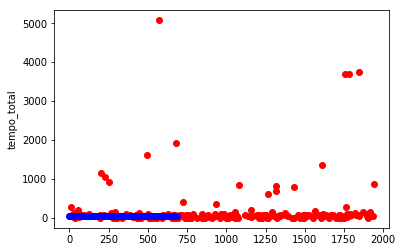

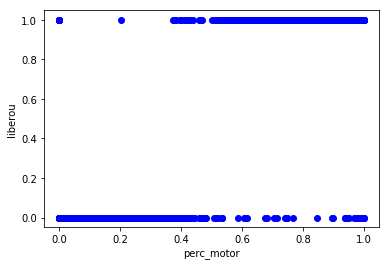

In [60]:
import matplotlib.pyplot as plt
plt.plot(out_tp_tot['tempo_total'],'ro')
plt.plot(good_aulas_data_set['tempo_total'],'bo')
plt.ylabel('tempo_total')
plt.show()


import matplotlib.pyplot as plt
plt.plot(good_aulas_data_set['perc_motor'],good_aulas_data_set['liberou'],'bo')
plt.ylabel('liberou')
plt.xlabel('perc_motor')
plt.show()

## Algoritmos e técnicas
Nesse trabalho serão utilizados classificadores de aprendizagem supervisionada e comprar suas performances com diferentes configurações.
Abaixo uma breve introdução sobre os algoritmos que serão testados, aproveitando conteúdo criado por mim mesmo no projeto Students Intervention:

#### Naive Bayes (GaussianNB)
Esse modelo criado a partir do teorema de bayes, utiliza formulas probalisticas para realizar a classificação dos exemplos fornecidos, é um bom processador de linguagem natural. Mas assume uma independência entre as variáveis ou seja ignora a correlação entre elas e por isso pode não mapear o problema da maneira adequada, apesar de funcionar em grande parte dos casos.
##### Exemplo de aplicação no mundo real
Filtragem de spam, caso clássico de uso do algoritmo.

##### Quais são as vantagens do modelo; quando ele tem desempenho melhor?
Precisa de poucos dados para treinamento. Fácil implementação. Funciona em grande parte dos problemas de classficação. Rápida execução.

##### Quais são as desvantagens do modelo, quando ele tem desempenho pior?
Não consegue mapear a depêndencia entre as variaveis.

##### O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?
Ele é um bom classificador. Lida bem com separação não linear. (temos 48 dimensões seria dificil garantir que os dados sejam separáveis linearmente) Lida bem com poucos exemplos de treinamento.

Fontes: http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

https://pt.slideshare.net/ashrafmath/naive-bayes-15644818

#### SVM
Esse modelo trabalha encontrando uma linha que melhor separe classes de dados, o que significa que ele utiliza hiper planos, para mapear os segmentos das funções, imagine que um conjunto de dados simples que conta com a altura de pessoa e vamos separar em alto e baixo, a partir de certo altura consideraremos alto e abaixo disso baixo, o método do SVM tentará encontrar uma linha que separe o máximo possível essas categorias, ou seja a que esteja mais longe possível limite inferior dos altos e do limite superior dos baixos, para problemas mais complexo o truqe é aumentar o número de dimensões para que seja possível efetuar essa separação.
##### Exemplo de aplicação no mundo real
Classificação de imagens. Bio Informática, Classificação de proteínas e de cânceres. Reconhecimento de escrita manual

##### Quais são as vantagens do modelo; quando ele tem desempenho melhor?
Funciona bem com pequenos conjuntos de treinamento. Generaliza bem o modelo. Lida com a não linearidade. Funciona bem em espaços com muitas dimensões. Encontra um mínimo global e não um mínimo local.

##### Quais são as desvantagens do modelo, quando ele tem desempenho pior?
Alta sensibilidaed a ruídos. Definição da função Kernel. Alto custo computacional.

##### O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?
Devido ao conjunto de treinamento não ser tão extensos e o número de características ser grande, esse é um bom candidato para utilizar nesses dados.

Fontes http://www.svms.org/

http://scikit-learn.org/stable/modules/svm.html

#### AdaBoost
Esse modelo trabalha com o conceito de aprendizes fracos, que são modelos que obtem uma performance ligeiramente acima do aleatório ao fazer previsões de resultados e agem no sistema de quorum, cada um desses aprendizes da um voto sobre qual é o resultado e a maioria elege um resultado vencedor.
##### Exemplo de aplicação no mundo real
Biologia, Visão computacional,Processamento de fala.
##### Quais são as vantagens do modelo; quando ele tem desempenho melhor?
 Baixa tendência a overfitting,    Atinge um erro mínimo global,    Tem uma boa flexibilidades, pois pode ser aplicado a vários tipos de classificadores.
Pode ser um aprendiz rápido dependendo do algoritmo.
##### Quais são as desvantagens do modelo, quando ele tem desempenho pior?
Tem alta sensilidade a ruído distribuido uniformemente, não lida bem com outliers.
O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?
Por ser um meta-algoritmo que utiliza uma série de outras instâncias de classificadores ou weak learners, apresenta bastante
    flexibilidade e irá me permitir procurar uma configuração ideal afim de obter uma boa pontuação na classificação.
Fontes: http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost

http://user.ceng.metu.edu.tr/~tcan/ceng734_f1112/Schedule/adaboost.pdf


## Comparativo
Hoje todo o processo é efetuado manualmente, o que leva a cada dia mais as aulas para análise se acumularem, utilizando um modelo de dados podemos efetuar avaliação automatica do casos mais triviais que representam a imensa maioria das aulas e deixar os casos mais sensíveis para análise humana, por isso sempre que a rede responder como não liberada a aula, a mesma será avaliada manualmente.

# Metodologia


## Pré processamento dos dados
Os dados já passaram por um pequeno pré-processamento antes de se tornarem o nosso dataset inicial, foram efetuados agrupamentos, calculados em percentuais e evitados nulos, afim de ter um conjunto de dados mais normalizados. Além optei por utilizar a técnica de remoção de outliers ainda na seção de exploração dos dados, conforme apresentado acima.
Nessa seção iremos avaliar a possibilidade de utilização de um algoritmo de seleção de atributos.
Além disso vamos separar os conjuntos de treinamento e teste.



In [61]:
from sklearn.decomposition import PCA
import renders as rs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

pca = PCA(n_components=30)

reduced_lst=pca.fit_transform(x_all)
pca.explained_variance_ratio_

reduced_data = pd.DataFrame(reduced_lst, columns = ['Dimension 1', 'Dimension 2','Dimension 3',
                                                    'Dimension 4','Dimension 5','Dimension 6',
                                                   'Dimension 7','Dimension 8','Dimension 9',
                                                   'Dimension 10','Dimension 11', 'Dimension 12','Dimension 13',
                                                    'Dimension 14','Dimension 15','Dimension 16',
                                                   'Dimension 17','Dimension 18','Dimension 19',
                                                   'Dimension 20','Dimension 21','Dimension 22', 'Dimension 23','Dimension 24',
                                                    'Dimension 25','Dimension 26','Dimension 27',
                                                   'Dimension 28','Dimension 29','Dimension 30'
                                                  ])


## Implementação
Nessa seção iremos realmente executar os passos necessários para execução do modelo, eu optei por testar a implementação com 3 modelos. Conforme descrito nas seções anteriores suas carcterísticas vantagens e desvantagens. Foi detalhar um pouco sobre o funcionamento dos modelos para que a leitura seja mais agradavel para pessoas com menos conhecimento prévio sobre os assuntos abordados nesse trabalho.


In [62]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()    
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print ("O modelo foi treinado em {:.4f} segundos".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print ("As previsões foram feitas em {:.4f} segundos.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print ("Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print ("Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test)))


# IV. Resultados
Abaixo a execução dos modelos com os resultados apontados a partir do F1 Score e também os dados sobre o tempo de execução de cada modelos

In [67]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import tree

X_train ,X_test ,y_train , y_test = train_test_split(reduced_data, y_all, test_size=0.24, random_state=42)
X_train_o ,X_test_o ,y_train_o , y_test_o = train_test_split(x_all, y_all, test_size=0.24, random_state=42)

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo

# Mostre o resultado da distribuição
print ("O conjunto de treinamento tem {} amostras.".format(X_train.shape[0]))
print ("O conjunto de teste tem {} amostras.".format(X_test.shape[0]))

clf_A = GaussianNB()
clf_B = svm.SVC(random_state=17)
clf_C = AdaBoostClassifier(random_state=7)
clf_D = tree.DecisionTreeClassifier()
print(X_train_o.shape)
print(X_test_o.shape)
print(y_train_o.shape)
print(y_test_o.shape)

clf_E = GaussianNB()
clf_F = svm.SVC(random_state=17)
clf_G = AdaBoostClassifier(random_state=7)
clf_H = tree.DecisionTreeClassifier()

print("Resultados com os dados transformados pelo PCA\r\n")
train_predict(clf_A, X_train, y_train, X_test, y_test)
print("\r\n")
train_predict(clf_B, X_train, y_train, X_test, y_test)
print("\r\n")
train_predict(clf_C, X_train, y_train, X_test, y_test)
print("\r\n")
train_predict(clf_D, X_train, y_train, X_test, y_test)
print("\r\n")
print("Resultados com os dados originais\r\n")
train_predict(clf_E, X_train_o,y_train_o, X_test_o,  y_test_o)
print("\r\n")
train_predict(clf_F, X_train_o,y_train_o, X_test_o,  y_test_o)
print("\r\n")
train_predict(clf_G, X_train_o,y_train_o, X_test_o,  y_test_o)
print("\r\n")
train_predict(clf_H, X_train_o,y_train_o, X_test_o,  y_test_o)


O conjunto de treinamento tem 519 amostras.
O conjunto de teste tem 165 amostras.
(519, 59)
(165, 59)
(519, 1)
(165, 1)
Resultados com os dados transformados pelo PCA

Treinando um GaussianNB com 519 pontos de treinamento. . .
O modelo foi treinado em 0.0050 segundos
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de treino: 0.7769.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.6772.


Treinando um SVC com 519 pontos de treinamento. . .
O modelo foi treinado em 0.0090 segundos
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de treino: 0.9440.
As previsões foram feitas em 0.0020 segundos.
Pontuação F1 para o conjunto de teste: 0.8780.


Treinando um AdaBoostClassifier com 519 pontos de treinamento. . .


C:\Users\vinic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


O modelo foi treinado em 0.1980 segundos
As previsões foram feitas em 0.0190 segundos.
Pontuação F1 para o conjunto de treino: 0.9961.
As previsões foram feitas em 0.0090 segundos.
Pontuação F1 para o conjunto de teste: 0.8947.


Treinando um DecisionTreeClassifier com 519 pontos de treinamento. . .
O modelo foi treinado em 0.0110 segundos
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de treino: 1.0000.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.8889.


Resultados com os dados originais

Treinando um GaussianNB com 519 pontos de treinamento. . .
O modelo foi treinado em 0.0020 segundos
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de treino: 0.9114.
As previsões foram feitas em 0.0010 segundos.
Pontuação F1 para o conjunto de teste: 0.8256.


Treinando um SVC com 519 pontos de treinamento. . .
O modelo foi treinado em 0.0100 segundos
As previsões foram feitas em 0.0060 segundos.
Pontua

C:\Users\vinic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
#Aqui um pequeno trecho de código caso seja do interesse do leitor efeturar testes com alguns dados do conjunto
ix=50
print(y_test.iloc[ix])
print(clf_C.predict(X_test.iloc[ix].values.reshape(1,30)))

liberou    1
Name: 78, dtype: int64
[1]


## Avaliação do modelo e validação
Como podemos avaliar nas tabelas acima, todos os modelos experimentados obtiveram sucesso considerável no conjunto de treinamento e foram capazes de generalizar no conjunto de testes, sendo assim podemos dizer que a princípio com uma precisão 0.87 todos são robustos o suficiente para resolução do problema sendo que os mais modestos necessitariam ainda de uma certa avaliação humana pois possuem uma taxa de erro ainda considerável, porém no que saiu melhor que no caso foi o AdaBoost a pontuação de 0,9932 com os dados originais no total possível de 1, indica que esse modelo muito provavelmente possa ser utilizado com confiança pela empresa sem análise posterior humana. Atingindo completamente seu objetivo final e por esse motivo será o classificador eleito para o trabalho. 
Como aprimoramento do modelo, buscamos efetuar um Grid Search e testamos sua performance com os dados transformados pelo PCA.
Como citado na etapa de implementação o Grid Search foi feito para o parâmetros n_estimators que já foram explicados, porém não representou melhoria na performance.
Com os dados transformados pelo PCA a pontuação F1 foi reduzida em 0,001, porém possamos considerar com uma melhoria, pois simplificamos um pouco o modelo e  obtivemos um pontuação praticamente idêntica.



In [75]:

parameters  = {'learning_rate':[0.8,0.9,1,1.1,1.2], 
               'n_estimators':[48,49,50,52]}

# TODO: Inicialize o classificador
clf = AdaBoostClassifier(random_state=7)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, greater_is_better=True)

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=f1_scorer)


# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj.fit(X_train_o,np.ravel(y_train_o.values))

# Get the estimator
clf = grid_obj.best_estimator_
# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print ("O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train_o, y_train_o)))
print ("O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test_o, y_test_o)))

As previsões foram feitas em 0.0060 segundos.
O modelo calibrado tem F1 de 1.0000 no conjunto de treinamento.
As previsões foram feitas em 0.0040 segundos.
O modelo calibrado tem F1 de 0.9342 no conjunto de teste.


Como pudemos ver através desse busca por parâmetros não foi possível melhorar ainda mais nosso modelo, 
a perfomance se manteve identica, mas tudo bem pois a mesma já era satisfatória.


## Justificativa
Como o processo hoje é feito manualmente e as aulas para análise vem se acumulando, isso considerando o volume atual de informações, se conseiderarmos o fato que esse volume tem uma previsão de aumento em 10 vezes, podemos imaginar que é plenamente necessário que um processo automático possa dar conta dessa avaliação, conforme demonstrado nas seções anteriores o modelo apresentado nesse trabalho é robusto o suficiente para realizar esse trabalho e através de uma implantação gradual começaremos a utilizar-lo afim de diminuir a demanda pela análise humana.

Outro fator importante que corrobora com nossa solução é o fato de ter obtido pontuação acima do modelo de ingênuo utilizado para comparativo 0,9932 contra 0,9200.

# V. Conclusão


## Reflexão
Desde o momento em que foi necessário a criação de um setor de auditoria para a análise de aulas veiculares com algum tipo de inconsistência eu enxerguei um potêncial problema, onde poderia se criar um gargalo no processo muitas vezes impedindo a conclusão do processo de algum aluno, devido ao fato de uma aula legitima ainda não ter sido liberada. Ao inciar esse curso passei a efetuar correlaçoes entre as técninas aprendidas e os problemas que o setor vinha enfrentando e também da sua própria natureza e passei a encarar-lo como o candidato perfeito para experimentação em um trabalho como esse, com o sucesso dessa implamentação tenho a intenção de demonstrar a eficiência do aprendizado de máquina para a auditoria de processos de diferente naturezas, ainda que a área já tenha sido considerávelmente explorada deixo aqui mais essa contribuição para que sirva de base para eventuais trabalhos futuros.


Explicação de características no modelo:

Ranking de características com PCA:
1. característica 0 (0.100000)
2. característica 5 (0.080000)
3. característica 11 (0.060000)
4. característica 7 (0.060000)
5. característica 6 (0.060000)
6. característica 19 (0.060000)
7. característica 10 (0.060000)
8. característica 23 (0.060000)
9. característica 25 (0.060000)
10. característica 27 (0.060000)
11. característica 22 (0.040000)
12. característica 2 (0.040000)
13. característica 1 (0.040000)
14. característica 15 (0.040000)
15. característica 9 (0.040000)
16. característica 3 (0.040000)
17. característica 8 (0.020000)
18. característica 14 (0.020000)
19. característica 20 (0.020000)
20. característica 24 (0.020000)
21. característica 26 (0.020000)
22. característica 12 (0.000000)
23. característica 13 (0.000000)
24. característica 28 (0.000000)
25. característica 16 (0.000000)
26. característica 17 (0.000000)
27. característica 18 (0.000000)
28. característica 4 (0.000000)
29. característica 21 (0.000000)
30. característica 29 (0.0

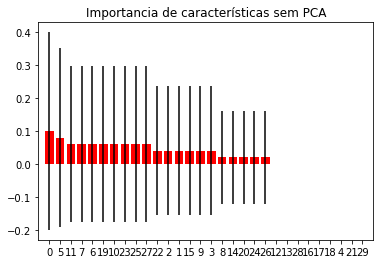

Ranking de características sem PCA:
1. característica 43 (0.180000)
2. característica 4 (0.120000)
3. característica 8 (0.080000)
4. característica 2 (0.060000)
5. característica 5 (0.060000)
6. característica 7 (0.060000)
7. característica 20 (0.060000)
8. característica 14 (0.040000)
9. característica 30 (0.040000)
10. característica 1 (0.040000)
11. característica 3 (0.040000)
12. característica 22 (0.040000)
13. característica 0 (0.020000)
14. característica 17 (0.020000)
15. característica 39 (0.020000)
16. característica 40 (0.020000)
17. característica 13 (0.020000)
18. característica 11 (0.020000)
19. característica 10 (0.020000)
20. característica 6 (0.020000)
21. característica 56 (0.020000)
22. característica 26 (0.000000)
23. característica 12 (0.000000)
24. característica 15 (0.000000)
25. característica 16 (0.000000)
26. característica 18 (0.000000)
27. característica 19 (0.000000)
28. característica 9 (0.000000)
29. característica 21 (0.000000)
30. característica 23 (0.0

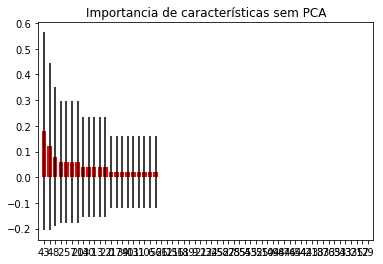

In [76]:
importances = clf_C.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_C.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Ranking de características com PCA:")

for f in range(X_train.shape[1]):
    print("%d. característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Importancia de características sem PCA")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


importances = clf_G.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_G.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Ranking de características sem PCA:")

for f in range(X_train_o.shape[1]):
    print("%d. característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Importancia de características sem PCA")
plt.bar(range(X_train_o.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_o.shape[1]), indices)
plt.xlim([-1, X_train_o.shape[1]])
plt.show()


## Melhorias
Como futuras melhorias no modelos podemos contar com uma base de dados ainda maior, e talvez simplificar um pouco no que diz respeito aos sensores talvez utilizando outras redes com auxílio na geração do conjunto de dados, por exemplo ao invés de apontar a distância em kilômetros já utilizarmos com input se a quilometragem está ou não compatível com uma aula legítima e o mesmo podem ser feito em outras características.